# TS clustering

In [1]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
from IPython.display import Audio 
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

In [2]:
# PAA version
# Each column is a record, and they're indexed by a string
df = pd.read_csv("df_PAA_TRAIN.csv", skipinitialspace=True)
df

0         1         2         3         4         5         6  \
0    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
1    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
3    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
4    -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
...        ...       ...       ...       ...       ...       ...       ...   
2745 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2746 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2747 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2748 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   
2749 -0.000173 -0.000134 -0.000144 -0.000154 -0.000165 -0.000187 -0.000127   

             7         8         9  ...      1818      1819      1820  \
0    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
1    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
3    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
4    -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
...        ...       ...       ...  ...       ...       ...       ...   
2745 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2746 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2747 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2748 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   
2749 -0.000106 -0.000091 -0.000181  ...  0.000003  0.000014  0.000061   

          1821      1822      1823      1824      1825      1826      1827  
0     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
1     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
3     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
4     0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
...        ...       ...       ...       ...       ...       ...       ...  
2745  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2746  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2747  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2748  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  
2749  0.000063  0.000063  0.000098  0.000065  0.000082  0.000031  0.000071  

[2750 rows x 1828 columns]

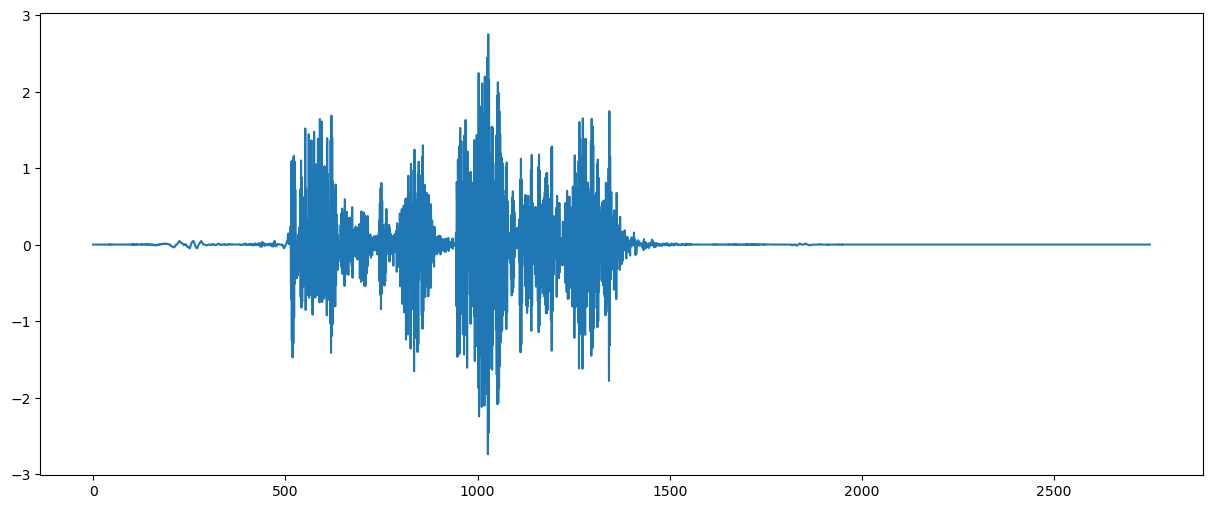

In [3]:
plt.figure(figsize=(15,6))
plt.plot(df['43'])
plt.show()

In [4]:
# after 2500 basically there is no more information
# we need an iterator for the drop method
def iterator(low, high):
    for i in range(low, high):
        yield i

df.drop(list(iterator(2500, 2750)), axis=0, inplace=True)

## miniSOM

In [34]:
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging

In [35]:
# 58 is the square root of the time series' length
som = MiniSom(2, 3, 2500, sigma=0.9, learning_rate=0.4)   # initialization of 2x3 SOM
som.random_weights_init(df.T.values)
som.train(df.T.values, 100)   # trains the SOM with 100 iterations

In [36]:
som.winner(df.T.values[0])

(0, 1)

In [37]:
# Little handy function to plot series

def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(17,8), dpi=200)
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [38]:
som_x = 2
som_y = 3

win_map = som.win_map(df.T.values)
# Returns the mapping of the winner nodes and inputs

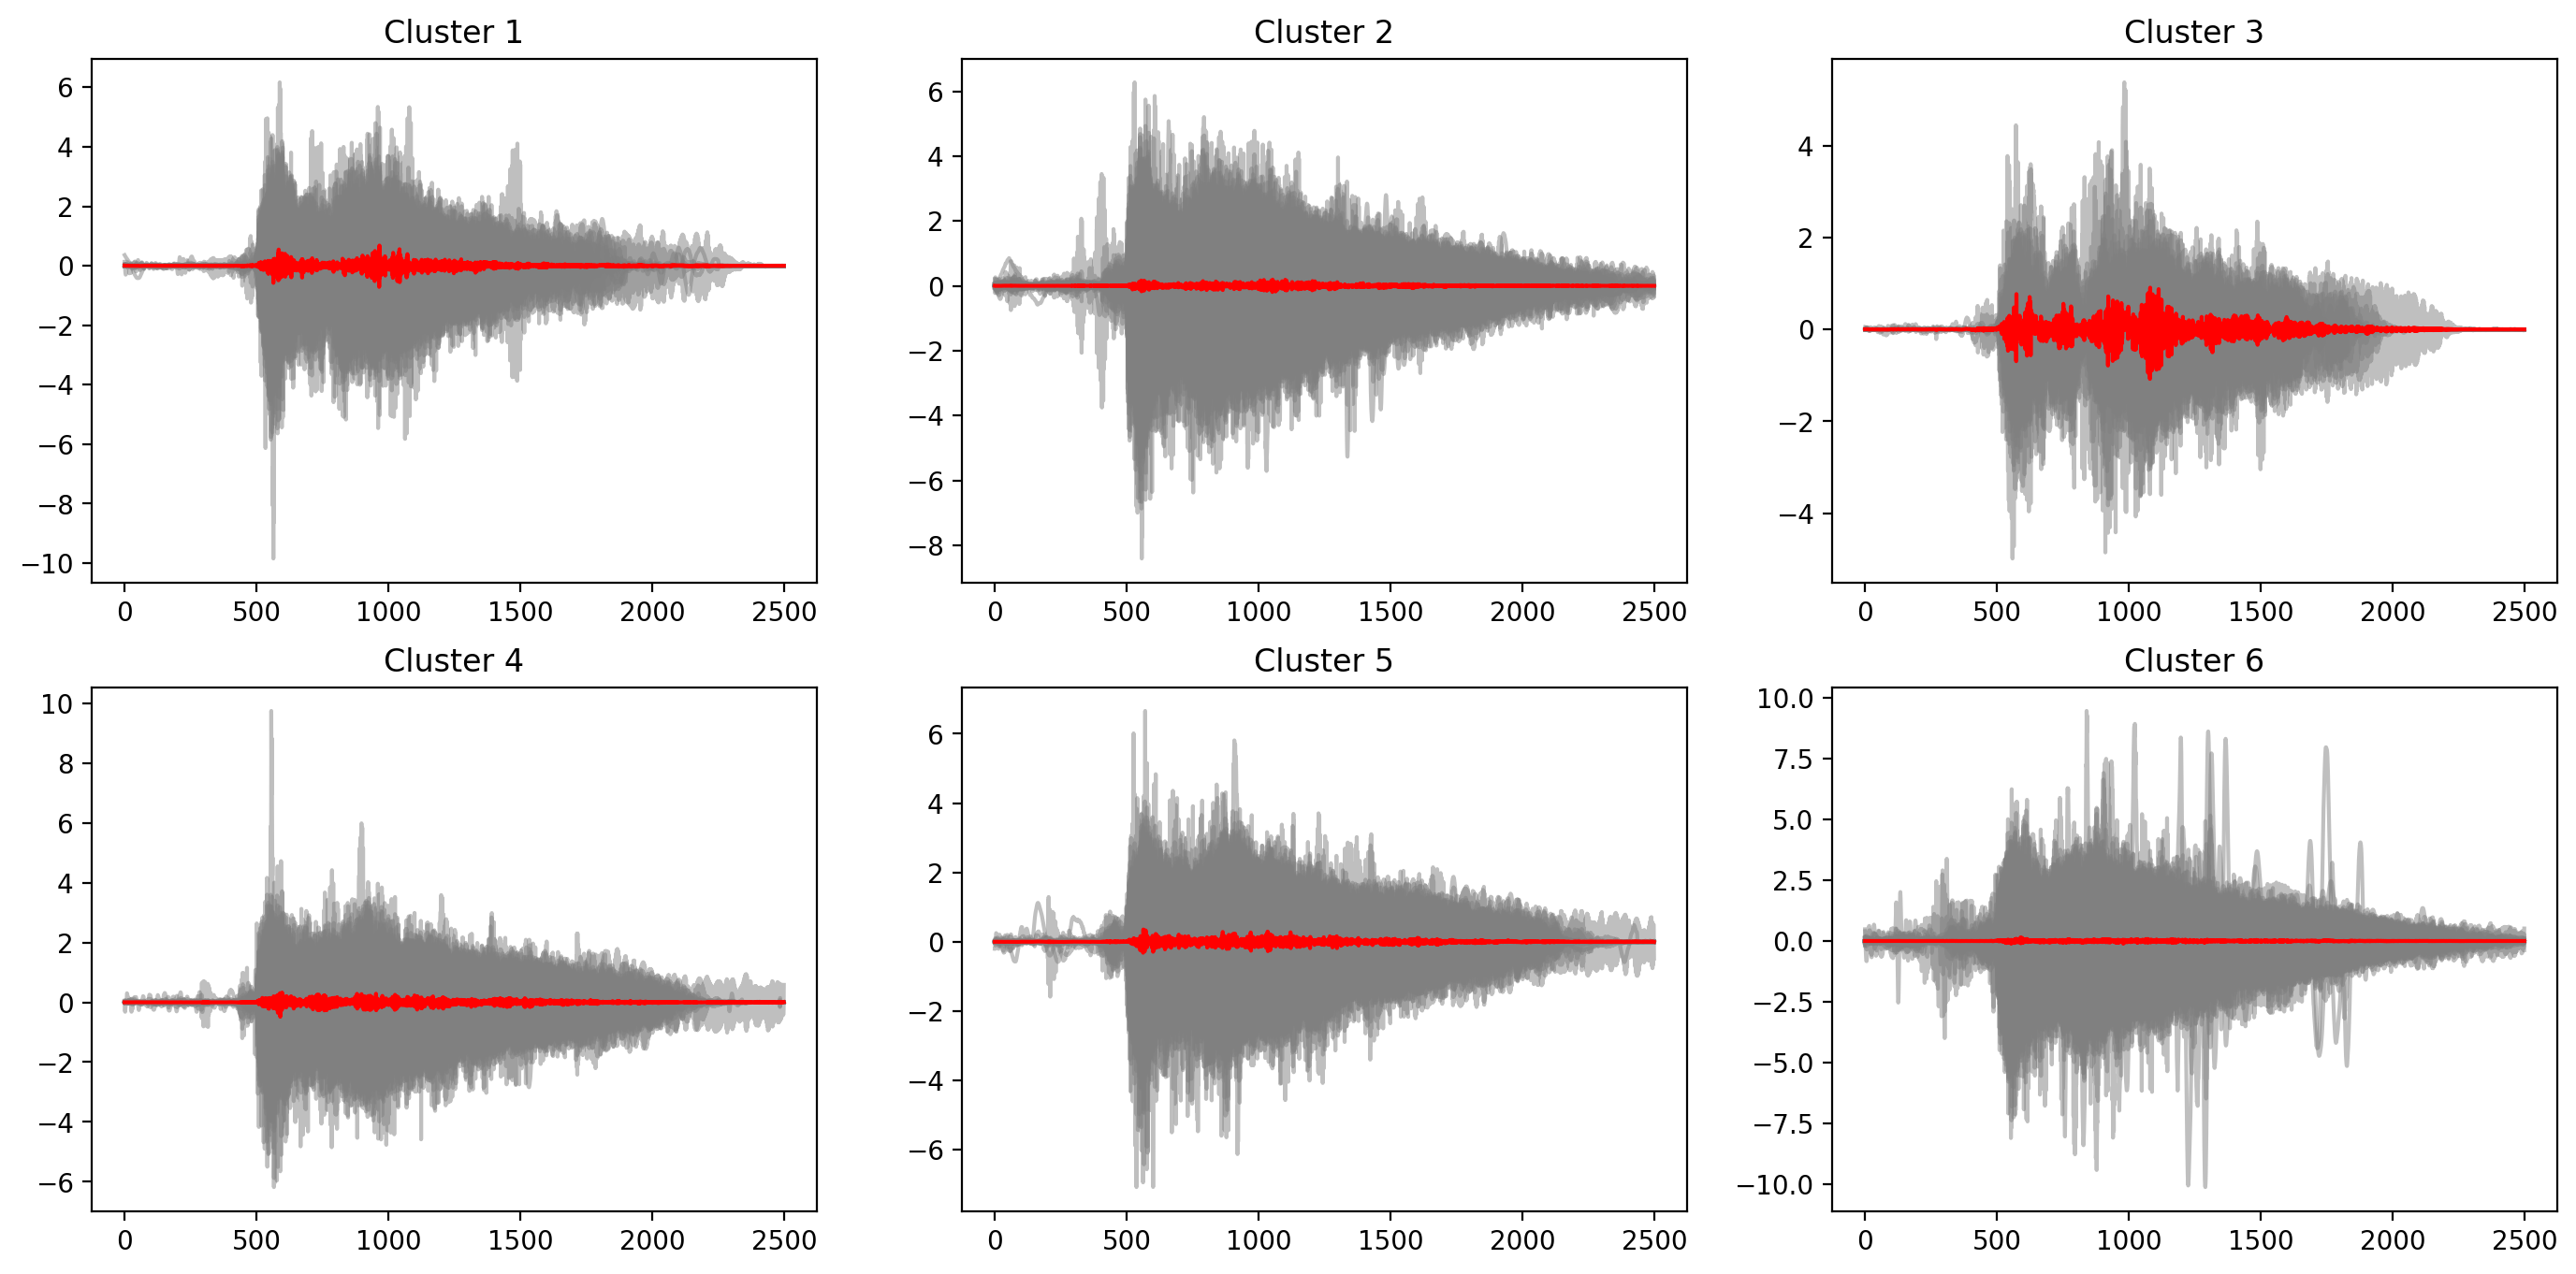

In [39]:
plot_som_series_averaged_center(som_x, som_y, win_map)

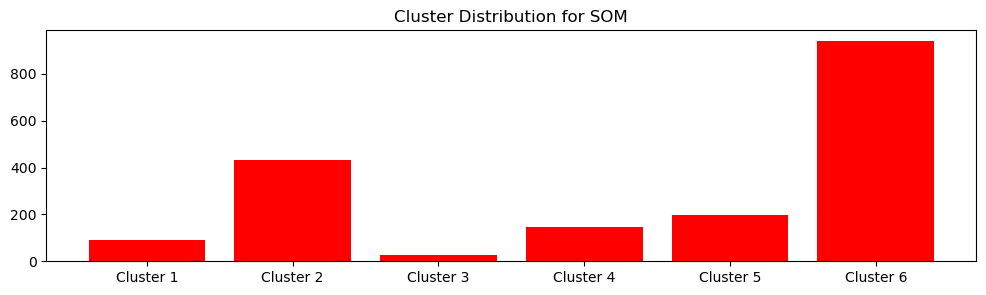

In [40]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(12,3))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c, color='r')
plt.show()

In [52]:
cluster_map = []
for idx in range(1828):
    winner_node = som.winner(df.T.values[idx])
    #cluster_map.append((int(df.columns[idx]), f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))
    cluster_map.append((int(df.columns[idx]), winner_node[0]*som_y+winner_node[1]+1))

labels_df = pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
labels_df.sort_values('Series', inplace=True)
labels_df

Cluster
Series         
0             2
1             2
2             2
3             6
4             1
...         ...
1823          6
1824          6
1825          2
1826          2
1827          1

[1828 rows x 1 columns]

In [42]:
df_labels = df.T.copy()
df_labels['SOM_label'] = labels_df['Cluster'].values
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2491      2492      2493  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2494      2495      2496      2497      2498      2499  SOM_label  
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173  Cluster 2  
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134  Cluster 2  
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144  Cluster 2  
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154  Cluster 6  
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165  Cluster 1  
...        ...       ...       ...       ...       ...       ...        ...  
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  Cluster 6  
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  Cluster 6  
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  Cluster 2  
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  Cluster 2  
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  Cluster 1  

[1828 rows x 2501 columns]

In [43]:
# just to plot clusters compositions
df_features = pd.read_csv("RavdessAudioOnlyfeatures_TRAIN.csv", skipinitialspace=True)
df_features.head(3)

modality vocal_channel  emotion emotional_intensity  \
0  audio-only        speech  neutral              normal   
1  audio-only        speech  neutral              normal   
2  audio-only        speech  neutral              normal   

                      statement repetition  actor sex  \
0  Kids are talking by the door        1st      1   M   
1  Kids are talking by the door        2nd      1   M   
2  Dogs are sitting by the door        1st      1   M   

                   filename  frame_count  ...  stft_max_w4  stft_q01_w4  \
0  03-01-01-01-01-01-01.wav       158558  ...          1.0     0.000000   
1  03-01-01-01-01-02-01.wav       160160  ...          1.0     0.368623   
2  03-01-01-01-02-01-01.wav       156956  ...          1.0     0.000000   

   stft_q05_w4  stft_q25_w4  stft_q50_w4  stft_q75_w4  stft_q95_w4  \
0     0.566462     0.709962     0.799141     0.896606          1.0   
1     0.472736     0.623183     0.744908     0.874713          1.0   
2     0.417919     0.643636     0.774253     0.899156          1.0   

   stft_q99_w4  stft_kur_w4  stft_skew_w4  
0          1.0     6.742190     -1.706215  
1          1.0    -0.700420     -0.201495  
2          1.0     1.688986     -1.024773  

[3 rows x 434 columns]

In [44]:
df_labels['sex'] = df_features['sex'].values
df_labels['vocal_channel'] = df_features['vocal_channel'].values
df_labels['statement'] = df_features['statement'].values
df_labels['emotion'] = df_features['emotion'].values

sex          F    M
SOM_label          
Cluster 1   40   49
Cluster 2  190  241
Cluster 3    5   20
Cluster 4   41  107
Cluster 5   78  118
Cluster 6  538  401


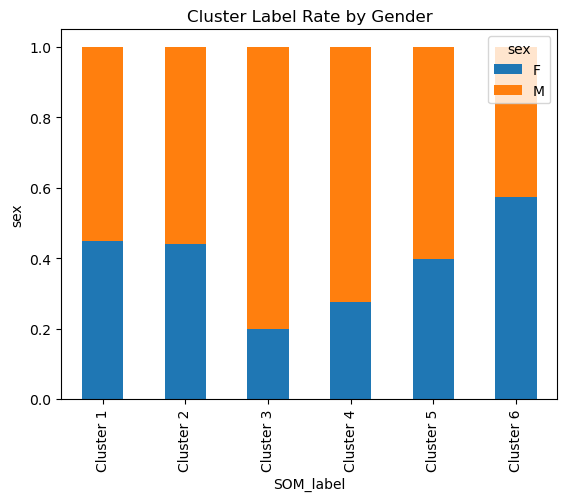

vocal_channel  song  speech
SOM_label                  
Cluster 1        15      74
Cluster 2       174     257
Cluster 3        12      13
Cluster 4        80      68
Cluster 5        80     116
Cluster 6       387     552


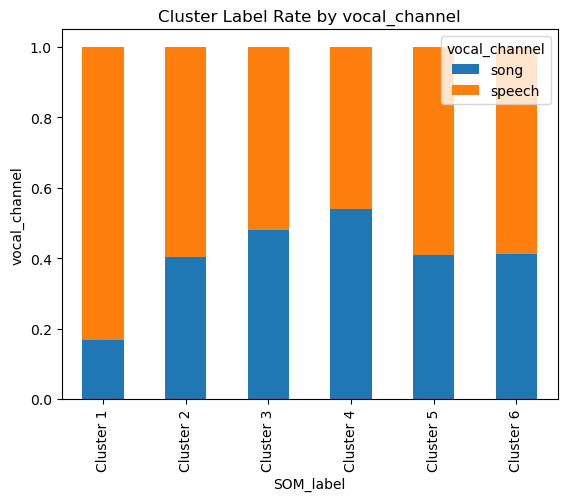

In [45]:
# sex:
kmeans_xt = pd.crosstab(df_labels['SOM_label'], df_labels['sex'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Gender')
plt.ylabel('sex')
#plt.xlabel('Cluster Label')
plt.show()

# vocal_channel:
kmeans_xt = pd.crosstab(df_labels['SOM_label'], df_labels['vocal_channel'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by vocal_channel')
plt.ylabel('vocal_channel')
#plt.xlabel('Cluster Label')
plt.show()

statement  Dogs are sitting by the door  Kids are talking by the door
SOM_label                                                            
Cluster 1                            42                            47
Cluster 2                           234                           197
Cluster 3                             8                            17
Cluster 4                            75                            73
Cluster 5                            98                            98
Cluster 6                           457                           482


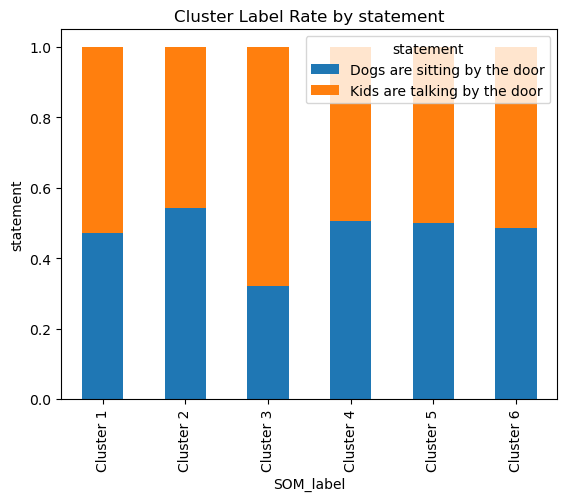

emotion    angry  calm  disgust  fearful  happy  neutral  sad  surprised
SOM_label                                                               
Cluster 1      9    15       13        7     12        5   19          9
Cluster 2     65    66       30       72     62       38   57         41
Cluster 3      0     7        5        4      5        0    3          1
Cluster 4     27    25        9       16     20       16   25         10
Cluster 5     20    34       16       30     28       20   33         15
Cluster 6    159   133       71      151    153       61  143         68


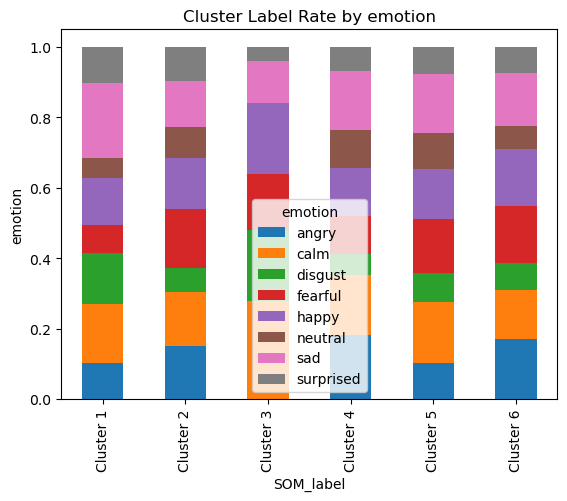

In [46]:
# statement:
kmeans_xt = pd.crosstab(df_labels['SOM_label'], df_labels['statement'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by statement')
plt.ylabel('statement')
#plt.xlabel('Cluster Label')
plt.show()

# emotion:
kmeans_xt = pd.crosstab(df_labels['SOM_label'], df_labels['emotion'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by emotion')
plt.ylabel('emotion')
#plt.xlabel('Cluster Label')
plt.show()

In [284]:
# TOO SLOW
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(17,8))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [134]:
#plot_som_series_dba_center(som_x, som_y, win_map)

### 2nd version

In [197]:
df.shape[0]

2750

In [220]:
# Initialization and training
data = df.values

som_shape = (2, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.3, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=13)

som.train_batch(data, 500, verbose=True)


 [   0 / 500 ]   0% - ? it/s
 [   0 / 500 ]   0% - ? it/s
 [   1 / 500 ]   0% - 0:00:00 left 
 [   2 / 500 ]   0% - 0:00:00 left 
 [   3 / 500 ]   1% - 0:00:00 left 
 [   4 / 500 ]   1% - 0:00:00 left 
 [   5 / 500 ]   1% - 0:00:00 left 
 [   6 / 500 ]   1% - 0:00:00 left 
 [   7 / 500 ]   1% - 0:00:00 left 
 [   8 / 500 ]   2% - 0:00:00 left 
 [   9 / 500 ]   2% - 0:00:00 left 
 [  10 / 500 ]   2% - 0:00:00 left 
 [  11 / 500 ]   2% - 0:00:00 left 
 [  12 / 500 ]   2% - 0:00:00 left 
 [  13 / 500 ]   3% - 0:00:00 left 
 [  14 / 500 ]   3% - 0:00:00 left 
 [  15 / 500 ]   3% - 0:00:00 left 
 [  16 / 500 ]   3% - 0:00:00 left 
 [  17 / 500 ]   3% - 0:00:00 left 
 [  18 / 500 ]   4% - 0:00:00 left 
 [  19 / 500 ]   4% - 0:00:00 left 
 [  20 / 500 ]   4% - 0:00:00 left 
 [  21 / 500 ]   4% - 0:00:00 left 
 [  22 / 500 ]   4% - 0:00:00 left 
 [  23 / 500 ]   5% - 0:00:00 left 
 [  24 / 500 ]   5% - 0:00:00 left 
 [  25 / 500 ]   5% - 0:00:00 left 
 [  26 / 500 ]   5% - 0:00:00 left 
 [  2


 quantization error: 13.605230808664174


In [221]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

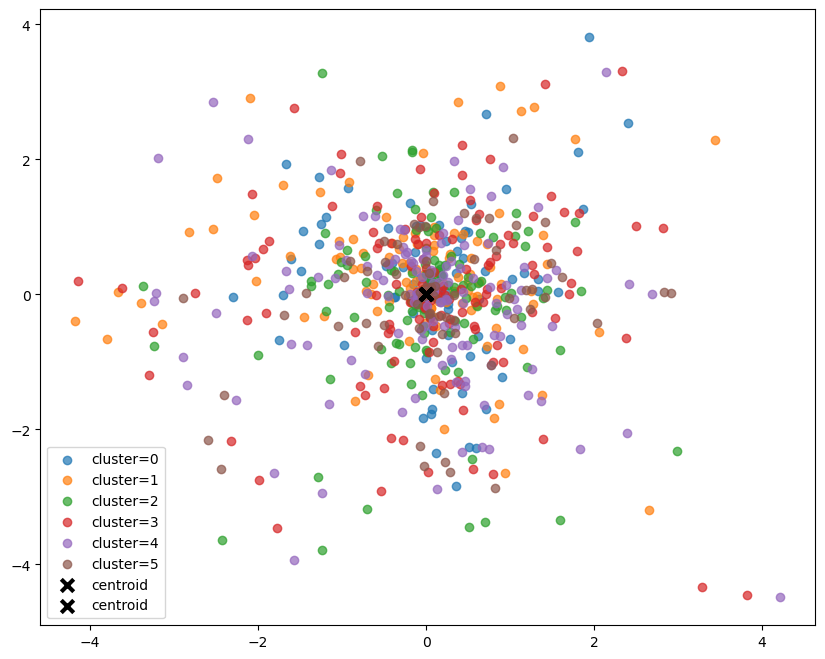

In [222]:
# plotting the clusters using the first 2 dimentions of the data
plt.figure(figsize=(10,8))
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=3, color='k', label='centroid')
plt.legend();

## K-means

In [11]:
from tslearn.clustering import TimeSeriesKMeans

In [12]:
X = df.values
X

array([[-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05],
       [-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05],
       [-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05],
       ...,
       [-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05],
       [-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05],
       [-1.73115613e-04, -1.33772023e-04, -1.43929845e-04, ...,
         8.15436240e-05,  3.12691389e-05,  7.11417348e-05]])

In [13]:
X.shape

(2750, 1828)

In [43]:
inertia_list = []

for i in tqdm(range(2, 20)):
    km = TimeSeriesKMeans(n_clusters=i, metric="euclidean", 
                      max_iter=20, n_init=3)   
    # with n_init=3 it chooses the best model between 3 different seeds
    km.fit(X.T)
    
    inertia_list.append(km.inertia_)

  0%|          | 0/18 [00:00<?, ?it/s]

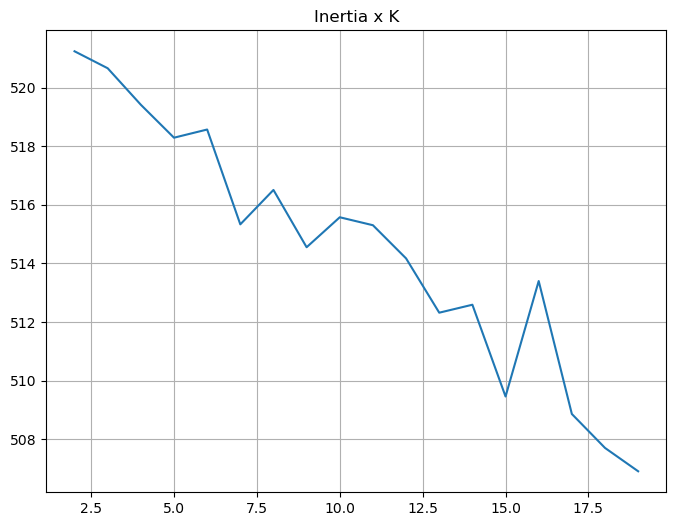

In [44]:
plt.figure(figsize=(8,6))
plt.title('Inertia x K')
plt.plot(np.arange(2, 20), inertia_list, alpha=1)
plt.grid()
plt.show()

In [14]:
n_clusters = 5
km = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", 
                      max_iter=20, random_state=14, n_init=5)   # with n_init=3 it chooses the best model between 3 different seeds
km.fit(X.T)

TimeSeriesKMeans(max_iter=20, n_clusters=5, n_init=5, random_state=14)

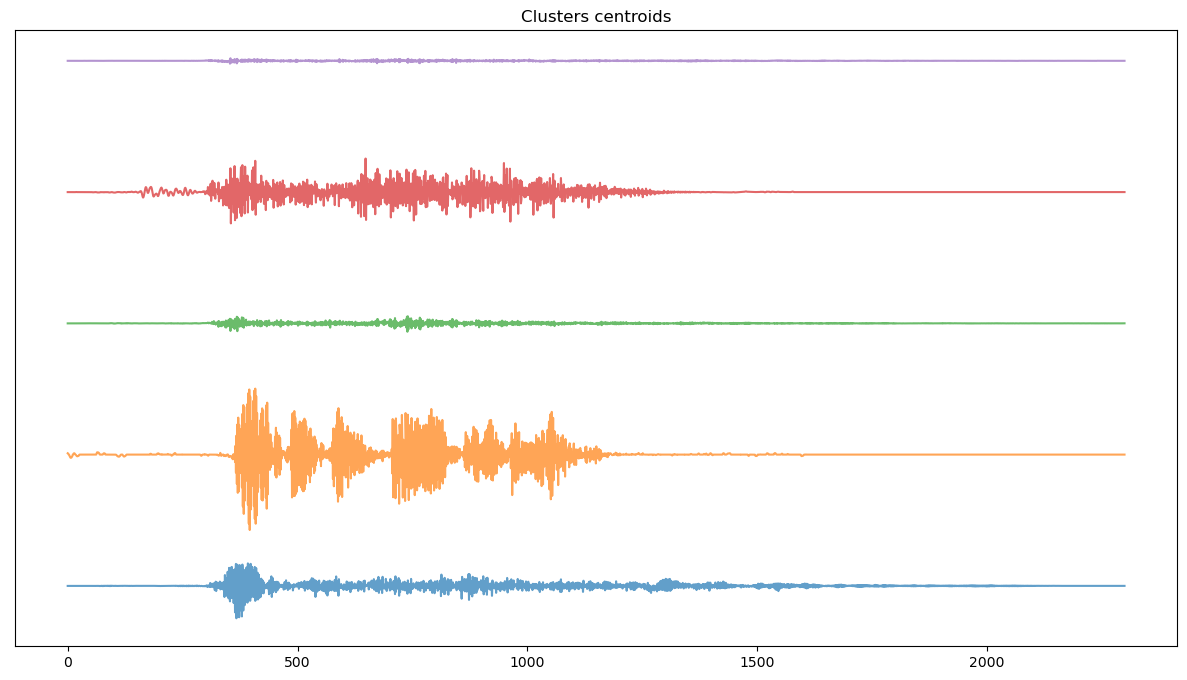

In [19]:
# visualize centroids

plt.figure(figsize=(15,8))
plt.title('Clusters centroids')
offset = 0   # for a better visualization
for i in range(km.cluster_centers_.shape[0]):
    plt.plot(np.squeeze(km.cluster_centers_)[i][200:2500].T+offset, alpha=0.7)
    offset += 6
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
print(km.inertia_)

for i in range(n_clusters):
    print('Cluster', i, ':', len(km.labels_[np.where(km.labels_ == i)]))

518.7593661068817
Cluster 0 : 39
Cluster 1 : 1
Cluster 2 : 440
Cluster 3 : 7
Cluster 4 : 1341


In [20]:
df_labels = df.T.copy()
df_labels['kmeans_label'] = km.labels_
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2741      2742      2743  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2744      2745      2746      2747      2748      2749  kmeans_label  
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173             2  
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134             2  
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144             4  
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154             2  
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165             2  
...        ...       ...       ...       ...       ...       ...           ...  
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098             2  
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065             4  
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082             2  
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031             2  
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071             2  

[1828 rows x 2751 columns]

In [21]:
# just to plot clusters compositions
df_features = pd.read_csv("RavdessAudioOnlyfeatures_TRAIN.csv", skipinitialspace=True)
df_features.head()

modality vocal_channel  emotion emotional_intensity  \
0  audio-only        speech  neutral              normal   
1  audio-only        speech  neutral              normal   
2  audio-only        speech  neutral              normal   
3  audio-only        speech  neutral              normal   
4  audio-only        speech     calm              normal   

                      statement repetition  actor sex  \
0  Kids are talking by the door        1st      1   M   
1  Kids are talking by the door        2nd      1   M   
2  Dogs are sitting by the door        1st      1   M   
3  Dogs are sitting by the door        2nd      1   M   
4  Kids are talking by the door        1st      1   M   

                   filename  frame_count  ...  stft_max_w4  stft_q01_w4  \
0  03-01-01-01-01-01-01.wav       158558  ...          1.0     0.000000   
1  03-01-01-01-01-02-01.wav       160160  ...          1.0     0.368623   
2  03-01-01-01-02-01-01.wav       156956  ...          1.0     0.000000   
3  03-01-01-01-02-02-01.wav       152152  ...          1.0     0.306280   
4  03-01-02-01-01-01-01.wav       169769  ...          1.0     0.248765   

   stft_q05_w4  stft_q25_w4  stft_q50_w4  stft_q75_w4  stft_q95_w4  \
0     0.566462     0.709962     0.799141     0.896606          1.0   
1     0.472736     0.623183     0.744908     0.874713          1.0   
2     0.417919     0.643636     0.774253     0.899156          1.0   
3     0.399641     0.606910     0.755213     0.886474          1.0   
4     0.428202     0.634815     0.759914     0.878014          1.0   

   stft_q99_w4  stft_kur_w4  stft_skew_w4  
0          1.0     6.742190     -1.706215  
1          1.0    -0.700420     -0.201495  
2          1.0     1.688986     -1.024773  
3          1.0    -0.594111     -0.412871  
4          1.0     0.126535     -0.620782  

[5 rows x 434 columns]

In [22]:
df_labels['sex'] = df_features['sex'].values
df_labels['vocal_channel'] = df_features['vocal_channel'].values
df_labels['statement'] = df_features['statement'].values
df_labels['emotion'] = df_features['emotion'].values
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2745      2746      2747  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2748      2749  kmeans_label  sex  vocal_channel  \
0    -0.000173 -0.000173             2    M         speech   
1    -0.000134 -0.000134             2    M         speech   
2    -0.000144 -0.000144             4    M         speech   
3    -0.000154 -0.000154             2    M         speech   
4    -0.000165 -0.000165             2    M         speech   
...        ...       ...           ...  ...            ...   
1823  0.000098  0.000098             2    F         speech   
1824  0.000065  0.000065             4    F         speech   
1825  0.000082  0.000082             2    F         speech   
1826  0.000031  0.000031             2    F         speech   
1827  0.000071  0.000071             2    F         speech   

                         statement    emotion  
0     Kids are talking by the door    neutral  
1     Kids are talking by the door    neutral  
2     Dogs are sitting by the door    neutral  
3     Dogs are sitting by the door    neutral  
4     Kids are talking by the door       calm  
...                            ...        ...  
1823  Dogs are sitting by the door  surprised  
1824  Kids are talking by the door  surprised  
1825  Kids are talking by the door  surprised  
1826  Dogs are sitting by the door  surprised  
1827  Dogs are sitting by the door  surprised  

[1828 rows x 2755 columns]

sex             F    M
kmeans_label          
0               0   39
1               1    0
2             165  275
3               1    6
4             725  616


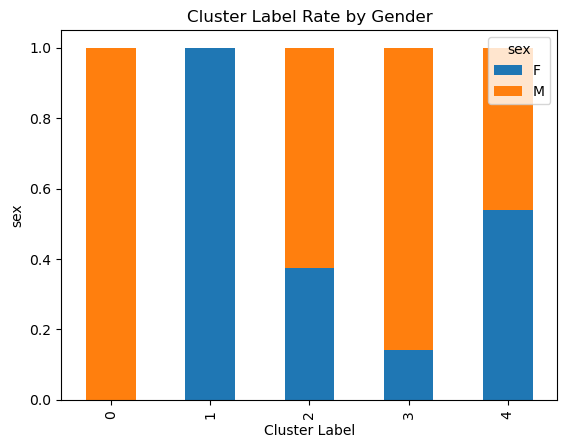

vocal_channel  song  speech
kmeans_label               
0                21      18
1                 0       1
2               123     317
3                 1       6
4               603     738


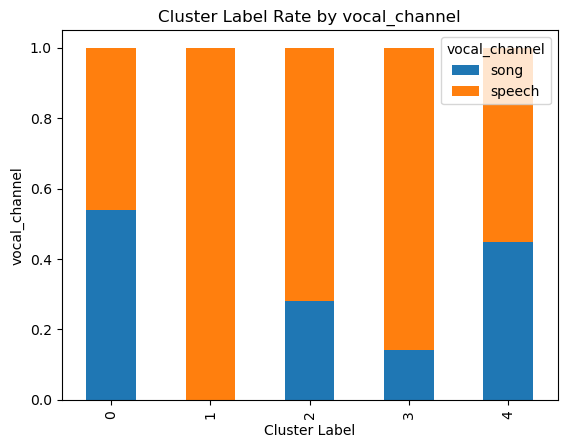

In [23]:
# sex:
kmeans_xt = pd.crosstab(df_labels['kmeans_label'], df_labels['sex'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Gender')
plt.ylabel('sex')
plt.xlabel('Cluster Label')
plt.show()

# vocal_channel:
kmeans_xt = pd.crosstab(df_labels['kmeans_label'], df_labels['vocal_channel'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by vocal_channel')
plt.ylabel('vocal_channel')
plt.xlabel('Cluster Label')
plt.show()

statement     Dogs are sitting by the door  Kids are talking by the door
kmeans_label                                                            
0                                       16                            23
1                                        0                             1
2                                      214                           226
3                                        2                             5
4                                      682                           659


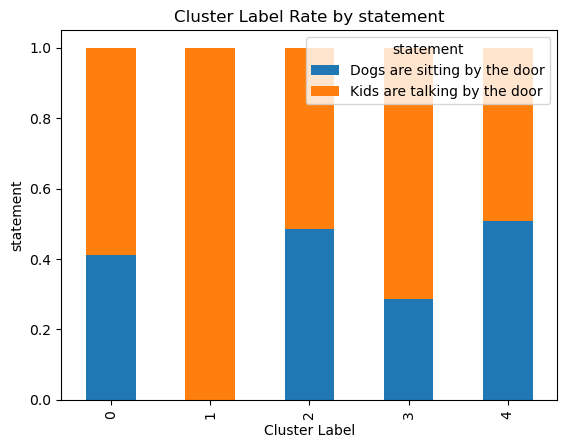

emotion       angry  calm  disgust  fearful  happy  neutral  sad  surprised
kmeans_label                                                               
0                 1     8        3        6      4        2   13          2
1                 0     0        0        0      0        1    0          0
2                58    77       37       58     65       30   59         56
3                 2     2        1        0      0        0    1          1
4               219   193      103      216    211      107  207         85


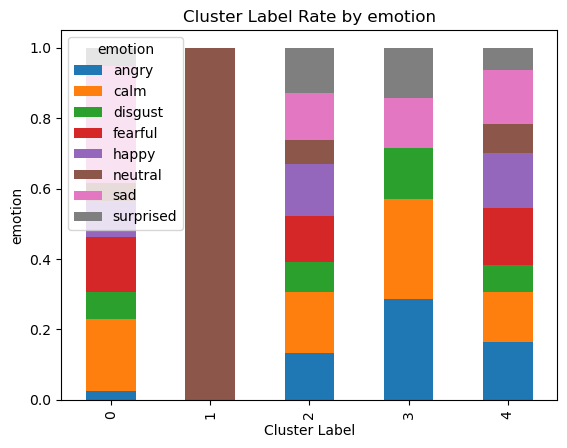

In [24]:
# statement:
kmeans_xt = pd.crosstab(df_labels['kmeans_label'], df_labels['statement'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by statement')
plt.ylabel('statement')
plt.xlabel('Cluster Label')
plt.show()

# emotion:
kmeans_xt = pd.crosstab(df_labels['kmeans_label'], df_labels['emotion'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by emotion')
plt.ylabel('emotion')
plt.xlabel('Cluster Label')
plt.show()

### DTW

In [81]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from pyts.metrics import dtw as dtw2

In [77]:
ts1 = df['0']
ts2 = df['7']

dist = dtw(ts1, ts2)
dist

18.962979776769423

In [78]:
from scipy.spatial.distance import cdist

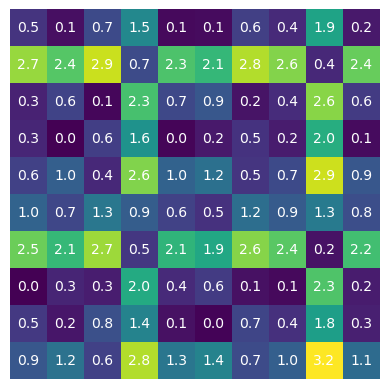

In [80]:
mat = cdist(ts1.values[1000:1010].reshape(-1,1), ts2.values[1000:1010].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

In [83]:
dtw2(ts1[1000:1010].ravel(), ts2[1000:1010].ravel(), dist='square', method='fast')

4.576666065168156

In [115]:
X_dtw = X.copy()
X_dtw = X_dtw[200:2500, 10:100]   # just 90 for tests
print(X_dtw.shape)

(2300, 90)


In [116]:
%%time

n_clusters = 4
km_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", 
                          max_iter=5, random_state=0)
km_dtw.fit(X_dtw.T)

Wall time: 8min 30s


TimeSeriesKMeans(max_iter=5, metric='dtw', n_clusters=4, random_state=0)

In [7]:
# Fra's kmeans
with open("km_dtw.pkl", "rb") as file:
    km_dtw = pickle.load(file)

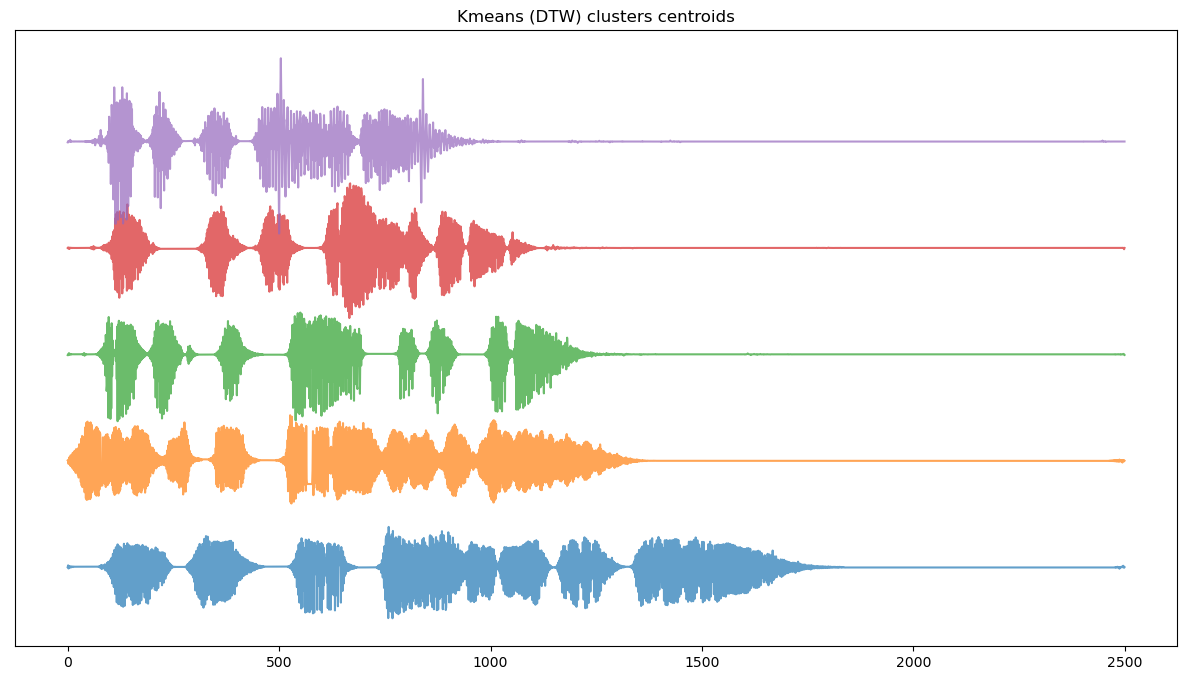

In [8]:
# visualize centroids
n_clusters = 5

plt.figure(figsize=(15,8))
plt.title('Kmeans (DTW) clusters centroids')
offset = 0   # for a better visualization
for i in range(km_dtw.cluster_centers_.shape[0]):
    plt.plot(np.squeeze(km_dtw.cluster_centers_)[i][0:].T+offset, alpha=0.7)
    offset += 6
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
print(km_dtw.inertia_)

for i in range(n_clusters):
    print('Cluster', i, ':', len(km_dtw.labels_[np.where(km_dtw.labels_ == i)]))

825.0230690451568
Cluster 0 : 378
Cluster 1 : 372
Cluster 2 : 465
Cluster 3 : 486
Cluster 4 : 127


In [10]:
df_labels = df.T.copy()
df_labels['kmeans_dtw_label'] = km_dtw.labels_
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2491      2492      2493  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2494      2495      2496      2497      2498      2499  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

      kmeans_dtw_label  
0                    4  
1                    4  
2                    3  
3                    4  
4                    4  
...                ...  
1823                 3  
1824                 3  
1825                 3  
1826                 3  
1827                 3  

[1828 rows x 2501 columns]

In [12]:
# just to plot clusters compositions
df_features = pd.read_csv("RavdessAudioOnlyfeatures_TRAIN.csv", skipinitialspace=True)
df_features.head()

modality vocal_channel  emotion emotional_intensity  \
0  audio-only        speech  neutral              normal   
1  audio-only        speech  neutral              normal   
2  audio-only        speech  neutral              normal   
3  audio-only        speech  neutral              normal   
4  audio-only        speech     calm              normal   

                      statement repetition  actor sex  \
0  Kids are talking by the door        1st      1   M   
1  Kids are talking by the door        2nd      1   M   
2  Dogs are sitting by the door        1st      1   M   
3  Dogs are sitting by the door        2nd      1   M   
4  Kids are talking by the door        1st      1   M   

                   filename  frame_count  ...  stft_max_w4  stft_q01_w4  \
0  03-01-01-01-01-01-01.wav       158558  ...          1.0     0.000000   
1  03-01-01-01-01-02-01.wav       160160  ...          1.0     0.368623   
2  03-01-01-01-02-01-01.wav       156956  ...          1.0     0.000000   
3  03-01-01-01-02-02-01.wav       152152  ...          1.0     0.306280   
4  03-01-02-01-01-01-01.wav       169769  ...          1.0     0.248765   

   stft_q05_w4  stft_q25_w4  stft_q50_w4  stft_q75_w4  stft_q95_w4  \
0     0.566462     0.709962     0.799141     0.896606          1.0   
1     0.472736     0.623183     0.744908     0.874713          1.0   
2     0.417919     0.643636     0.774253     0.899156          1.0   
3     0.399641     0.606910     0.755213     0.886474          1.0   
4     0.428202     0.634815     0.759914     0.878014          1.0   

   stft_q99_w4  stft_kur_w4  stft_skew_w4  
0          1.0     6.742190     -1.706215  
1          1.0    -0.700420     -0.201495  
2          1.0     1.688986     -1.024773  
3          1.0    -0.594111     -0.412871  
4          1.0     0.126535     -0.620782  

[5 rows x 434 columns]

In [13]:
df_labels['sex'] = df_features['sex'].values
df_labels['vocal_channel'] = df_features['vocal_channel'].values
df_labels['statement'] = df_features['statement'].values
df_labels['emotion'] = df_features['emotion'].values
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2495      2496      2497  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2498      2499  kmeans_dtw_label  sex  vocal_channel  \
0    -0.000173 -0.000173                 4    M         speech   
1    -0.000134 -0.000134                 4    M         speech   
2    -0.000144 -0.000144                 3    M         speech   
3    -0.000154 -0.000154                 4    M         speech   
4    -0.000165 -0.000165                 4    M         speech   
...        ...       ...               ...  ...            ...   
1823  0.000098  0.000098                 3    F         speech   
1824  0.000065  0.000065                 3    F         speech   
1825  0.000082  0.000082                 3    F         speech   
1826  0.000031  0.000031                 3    F         speech   
1827  0.000071  0.000071                 3    F         speech   

                         statement    emotion  
0     Kids are talking by the door    neutral  
1     Kids are talking by the door    neutral  
2     Dogs are sitting by the door    neutral  
3     Dogs are sitting by the door    neutral  
4     Kids are talking by the door       calm  
...                            ...        ...  
1823  Dogs are sitting by the door  surprised  
1824  Kids are talking by the door  surprised  
1825  Kids are talking by the door  surprised  
1826  Dogs are sitting by the door  surprised  
1827  Dogs are sitting by the door  surprised  

[1828 rows x 2505 columns]

sex                 F    M
kmeans_dtw_label          
0                   4  374
1                 359   13
2                 107  358
3                 407   79
4                  15  112


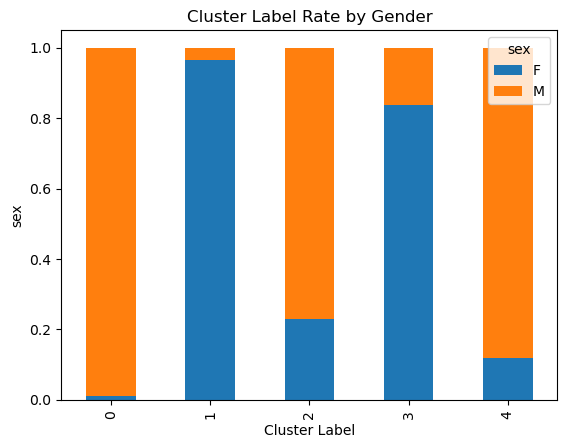

vocal_channel     song  speech
kmeans_dtw_label              
0                  371       7
1                  337      35
2                   15     450
3                   21     465
4                    4     123


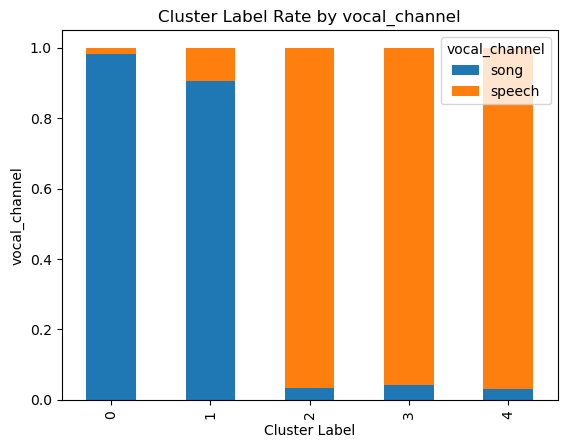

In [14]:
# sex:
kmeans_xt = pd.crosstab(df_labels['kmeans_dtw_label'], df_labels['sex'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Gender')
plt.ylabel('sex')
plt.xlabel('Cluster Label')
plt.show()

# vocal_channel:
kmeans_xt = pd.crosstab(df_labels['kmeans_dtw_label'], df_labels['vocal_channel'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by vocal_channel')
plt.ylabel('vocal_channel')
plt.xlabel('Cluster Label')
plt.show()

statement         Dogs are sitting by the door  Kids are talking by the door
kmeans_dtw_label                                                            
0                                          195                           183
1                                          197                           175
2                                          248                           217
3                                          247                           239
4                                           27                           100


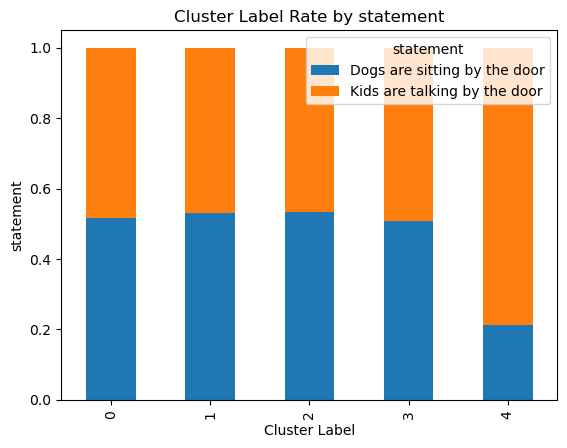

emotion           angry  calm  disgust  fearful  happy  neutral  sad  \
kmeans_dtw_label                                                       
0                    69    77        0       58     71       36   67   
1                    77    65        9       62     62       33   64   
2                    63    77       66       51     63       39   64   
3                    60    38       54       89     69       22   63   
4                    11    23       15       20     15       10   22   

emotion           surprised  
kmeans_dtw_label             
0                         0  
1                         0  
2                        42  
3                        91  
4                        11  


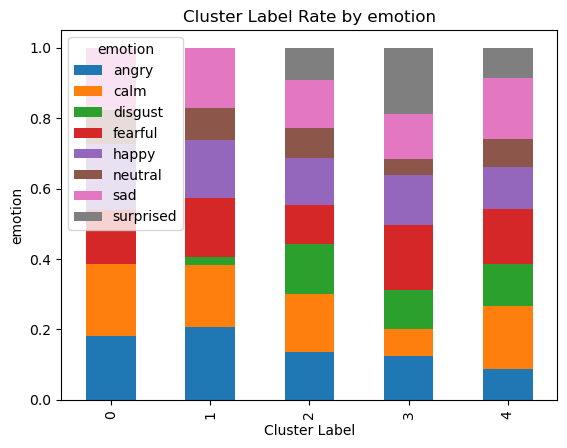

In [15]:
# statement:
kmeans_xt = pd.crosstab(df_labels['kmeans_dtw_label'], df_labels['statement'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by statement')
plt.ylabel('statement')
plt.xlabel('Cluster Label')
plt.show()

# emotion:
kmeans_xt = pd.crosstab(df_labels['kmeans_dtw_label'], df_labels['emotion'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by emotion')
plt.ylabel('emotion')
plt.xlabel('Cluster Label')
plt.show()

In [79]:
X = df.values
X.shape

(2500, 1828)

### T-sne

In [64]:
# visualiation using Tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.T)
X_tsne.shape

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1828, 2)

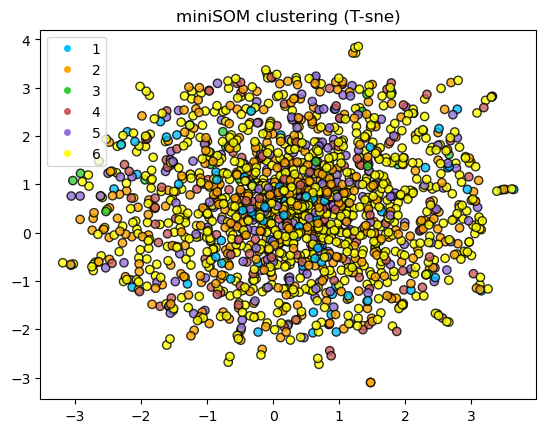

In [65]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

plt.title('miniSOM clustering (T-sne)')
          
unique_labels = list(set(labels_df['Cluster'].values))

colors = ['deepskyblue', 'orange', 'limegreen', 'indianred', 'mediumpurple', 'yellow']
cmap =  ListedColormap(colors[:len(unique_labels)])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_df['Cluster'].values, cmap=cmap, edgecolor='k', alpha=0.8)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                   markerfacecolor=color) for label, color in zip(unique_labels, colors)]
plt.legend(handles=legend_handles)
plt.show()

In [75]:
df_fra = pd.read_csv("csv\df_paa.csv", skipinitialspace=True)
df_fra.head()

0         1         2         3         4         5         6  \
0 -0.000779 -0.000113  0.002085  0.008824  0.010352  0.007158  0.002560   
1 -0.000510 -0.000854 -0.002663 -0.000631 -0.001450  0.000566  0.000108   
2 -0.000126 -0.000839 -0.002406 -0.000264 -0.000174 -0.000174  0.000089   
3 -0.008125 -0.000683  0.000135  0.003130 -0.001028 -0.000377  0.000188   
4  0.000455 -0.000022  0.005009  0.001288  0.004073 -0.000539 -0.000928   

          7         8         9  ...      2490      2491      2492      2493  \
0 -0.004379 -0.011999 -0.012824  ... -0.000228 -0.000228 -0.000228 -0.000228   
1  0.000178  0.000108  0.001540  ... -0.000152 -0.000152 -0.000152 -0.000152   
2  0.001647  0.000202 -0.000056  ... -0.000174 -0.000174 -0.000174 -0.000174   
3  0.000288  0.003020 -0.000257  ... -0.000186 -0.000186 -0.000186 -0.000186   
4 -0.003226 -0.001834 -0.003780  ... -0.000269 -0.000269 -0.000269 -0.000269   

       2494      2495      2496      2497      2498      2499  
0 -0.000228 -0.000228 -0.000228 -0.000228 -0.000228 -0.000228  
1 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152  
2 -0.000174 -0.000174 -0.000174 -0.000174 -0.000174 -0.000174  
3 -0.000186 -0.000186 -0.000186 -0.000186 -0.000186 -0.000186  
4 -0.000269 -0.000269 -0.000269 -0.000269 -0.000269 -0.000269  

[5 rows x 2500 columns]

In [108]:
X_fra = df_fra.values

tsne = TSNE(n_components=2)
X_fra_tsne = tsne.fit_transform(X_fra)
X_fra_tsne.shape

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1828, 2)

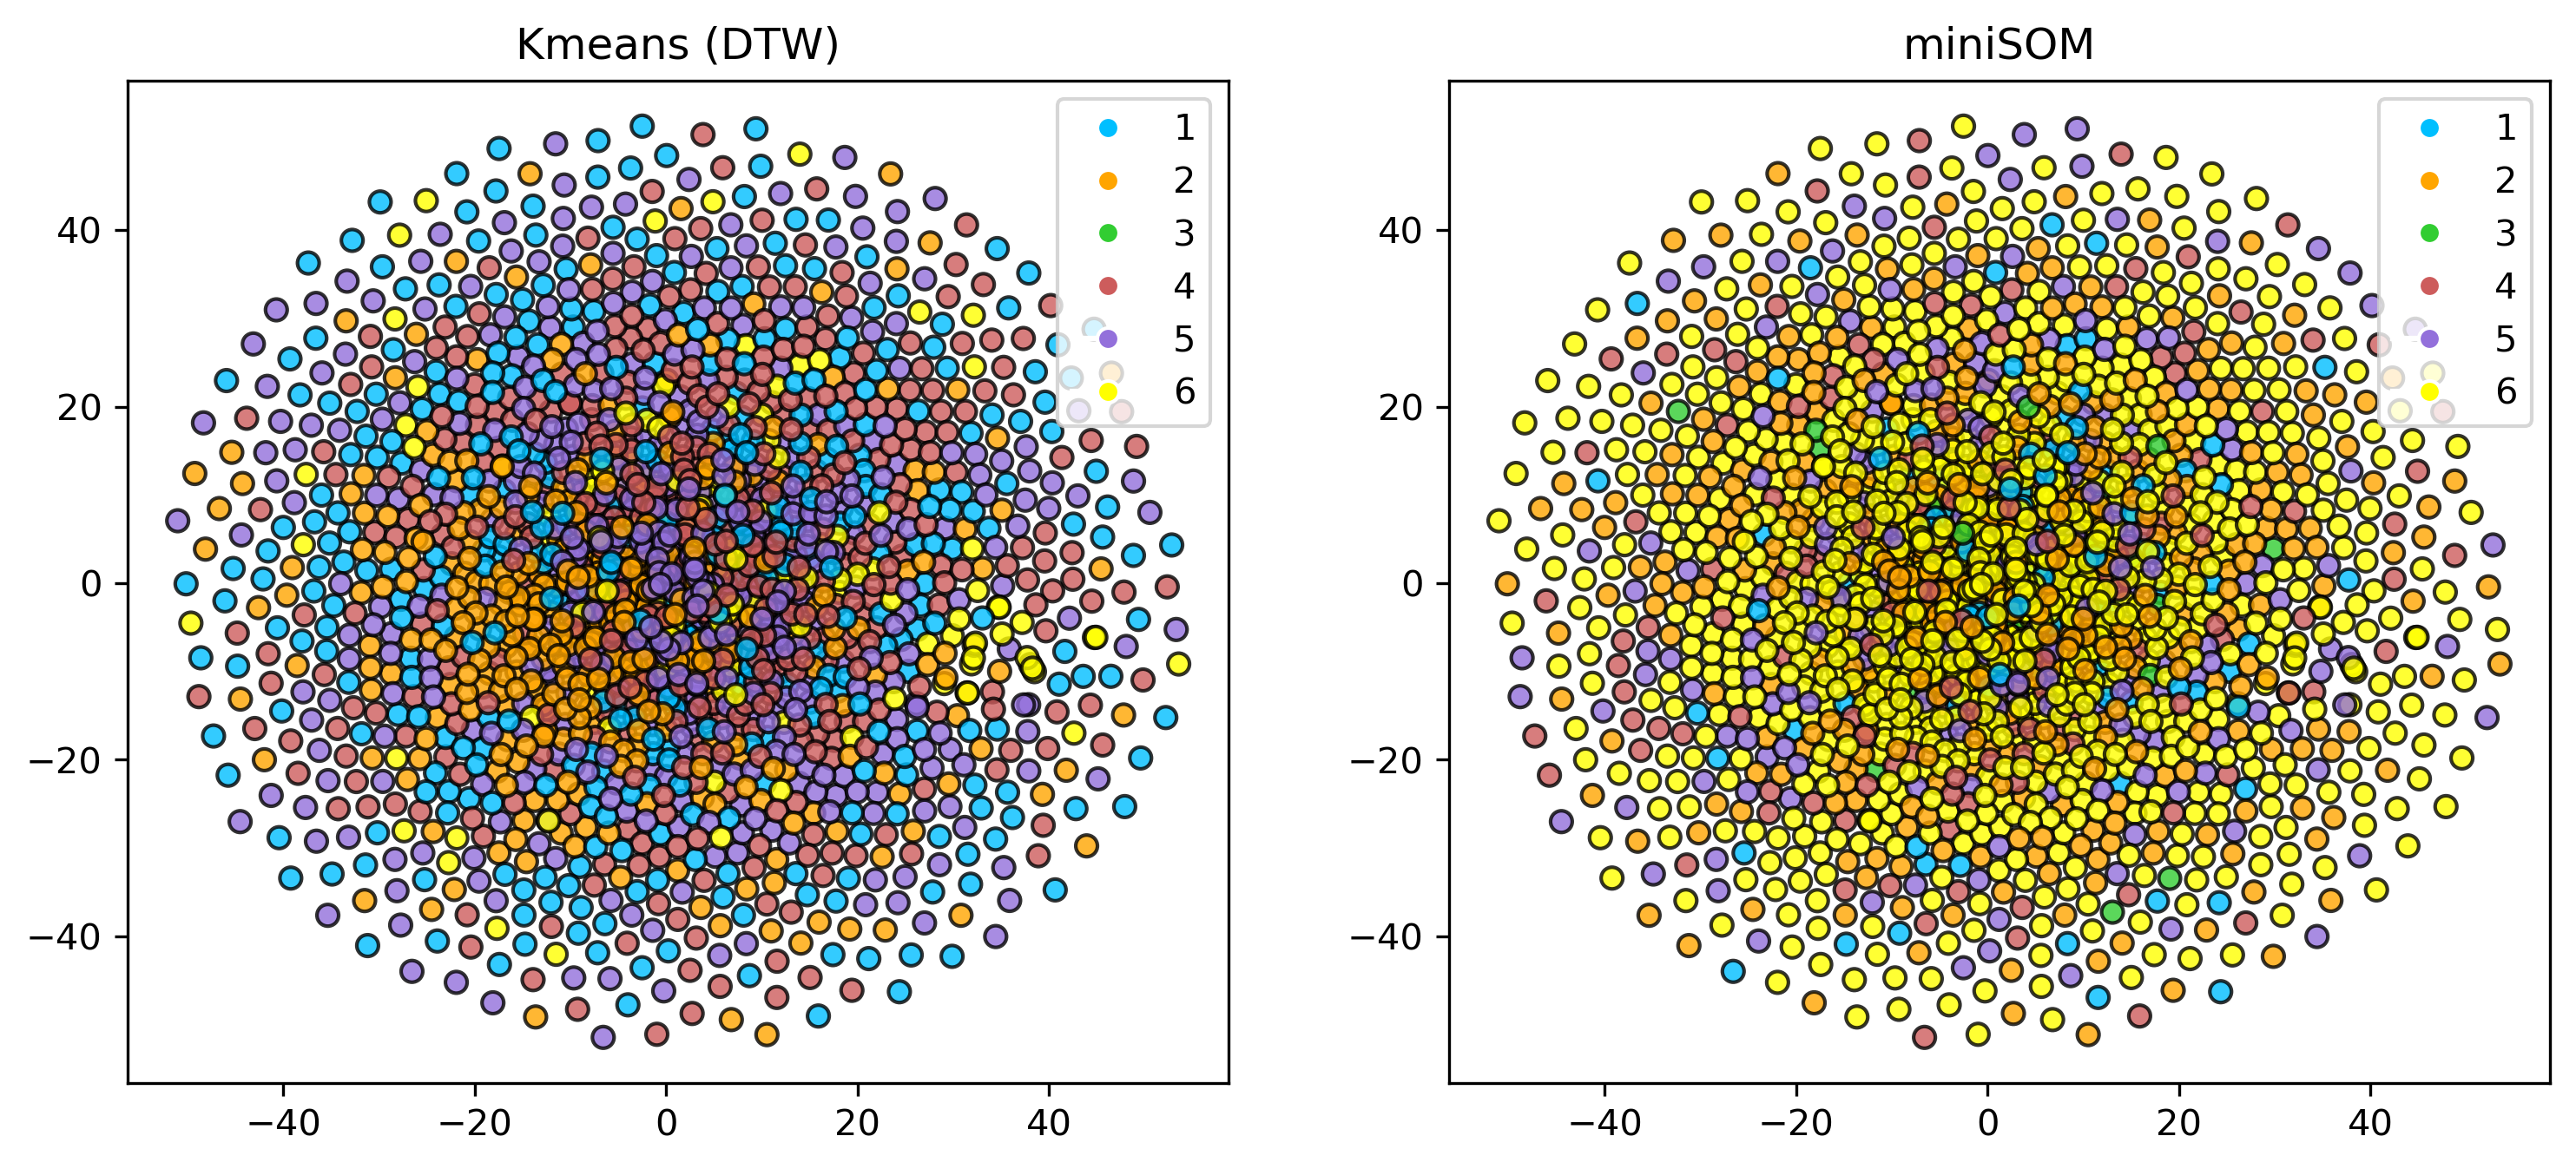

In [109]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,5), dpi=300)
axes[0].set_title('Kmeans (DTW)', size=12)
axes[1].set_title('miniSOM', size=12)

axes[0].scatter(X_fra_tsne[:, 0], X_fra_tsne[:, 1], c=km_dtw.labels_, cmap=cmap, edgecolor='k', alpha=0.8)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                   markerfacecolor=color) for label, color in zip(unique_labels, colors)]
axes[0].legend(handles=legend_handles)

axes[1].scatter(X_fra_tsne[:, 0], X_fra_tsne[:, 1], c=labels_df['Cluster'].values, cmap=cmap, edgecolor='k', alpha=0.8)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                   markerfacecolor=color) for label, color in zip(unique_labels, colors)]
axes[1].legend(handles=legend_handles)

plt.show()

In [91]:
np.where((X_fra_tsne[:, 1]>6))

(array([560], dtype=int64),)

In [92]:
X_fra_tsne[:, 1][560]

14.074455

In [100]:
X_fra_tsne[0:560] + X_fra_tsne[0:2]

ValueError: operands could not be broadcast together with shapes (560,2) (2,2) 

In [103]:
X_fra_tsne = np.concatenate((X_fra_tsne[0:560], X_fra_tsne[561:]), axis=0)

In [104]:
X_fra_tsne.shape

(1827, 2)

In [111]:
from tslearn.clustering import TimeSeriesKMeans

In [112]:
n_clusters = 5
km_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", 
                          max_iter=15, random_state=1)
km_dtw.fit(X_fra)

TimeSeriesKMeans(max_iter=15, n_clusters=5, random_state=1)

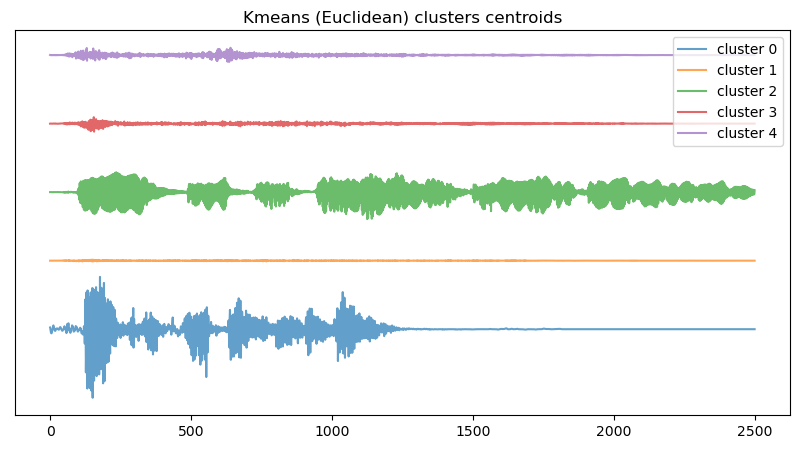

In [114]:
# visualize centroids
n_clusters = 5

plt.figure(figsize=(10,5))
plt.title('Kmeans (Euclidean) clusters centroids')
offset = 0   # for a better visualization
for i in range(km_dtw.cluster_centers_.shape[0]):
    plt.plot(np.squeeze(km_dtw.cluster_centers_)[i][0:].T+offset, alpha=0.7, label=('cluster ' + str(i)))
    offset += 6
#plt.#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.legend(loc='upper right')
plt.show()

## Compression-based Clustering

In [49]:
from sklearn.metrics import pairwise_distances
import zlib
import string

In [46]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [52]:
for i in tqdm(pairwise_distances(X.reshape(X.shape[0], X.shape[1]), 
                       metric=cdm_dist)):
    M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), 
                       metric=cdm_dist)

KeyboardInterrupt: 

In [ ]:
M.shape

In [ ]:
plt.plot(sorted(M.ravel()))
plt.show()

## Features-based Clustering

In [55]:
from sklearn.cluster import KMeans
import scipy.stats as stats

In [56]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [61]:
F = [list(calculate_features(x).values())[:-2] for x in X.T]

In [73]:
n_clusters = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(F)

KMeans(n_clusters=5)

In [74]:
kmeans.inertia_

41.562817128371066

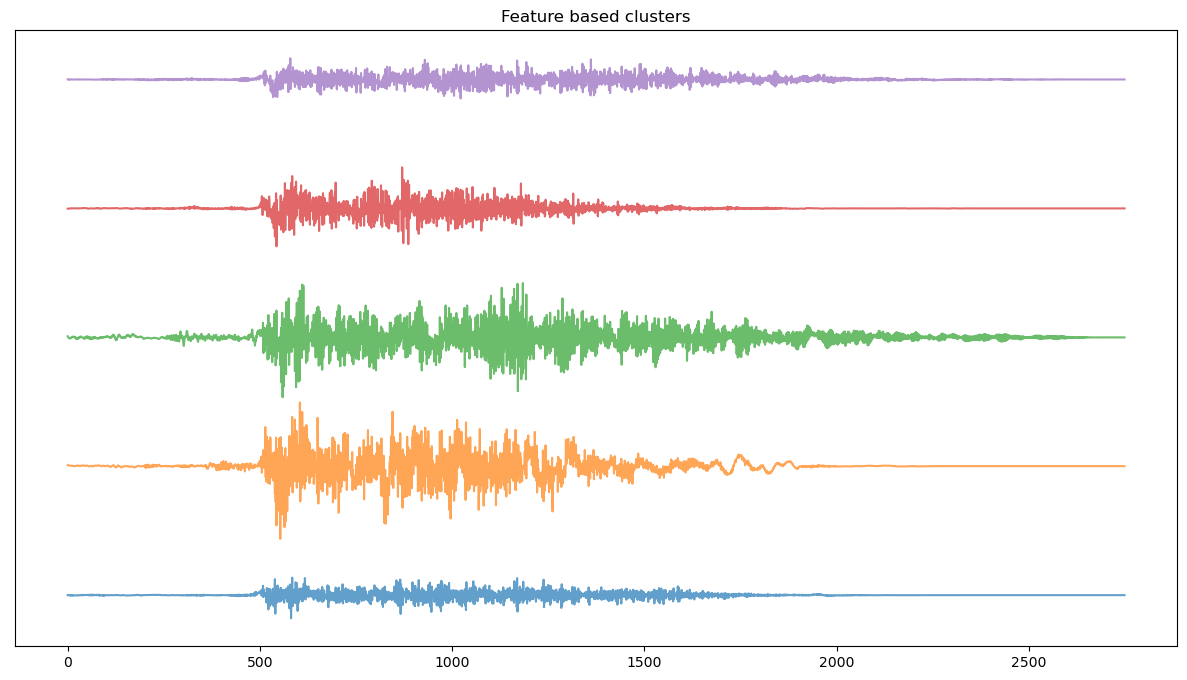

In [87]:
plt.figure(figsize=(15,8))
plt.title('Feature based clusters')
offset = 0
for i in range(n_clusters):
    plt.plot(np.mean(X.T[np.where(kmeans.labels_ == i)[0]]+offset, axis=0), alpha=0.7)
    offset += 0.5
    
#hide y-axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()

In [77]:
print(kmeans.inertia_)

somma = 0
for i in range(n_clusters):
    print('Cluster', i, ':', len(kmeans.labels_[np.where(kmeans.labels_ == i)]))
    somma += len(kmeans.labels_[np.where(kmeans.labels_ == i)])
    
print(somma)

41.562817128371066
Cluster 0 : 417
Cluster 1 : 236
Cluster 2 : 208
Cluster 3 : 469
Cluster 4 : 498
1828


In [78]:
df_labels = df.T.copy()
df_labels['kmeans_features_label'] = kmeans.labels_
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2741      2742      2743  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2744      2745      2746      2747      2748      2749  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

      kmeans_features_label  
0                         3  
1                         3  
2                         3  
3                         3  
4                         3  
...                     ...  
1823                      1  
1824                      3  
1825                      3  
1826                      3  
1827                      3  

[1828 rows x 2751 columns]

In [79]:
df_labels['sex'] = df_features['sex'].values
df_labels['vocal_channel'] = df_features['vocal_channel'].values
df_labels['statement'] = df_features['statement'].values
df_labels['emotion'] = df_features['emotion'].values
df_labels

0         1         2         3         4         5         6  \
0    -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165 -0.000165   
...        ...       ...       ...       ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071  0.000071   

             7         8         9  ...      2745      2746      2747  \
0    -0.000173 -0.000173 -0.000173  ... -0.000173 -0.000173 -0.000173   
1    -0.000134 -0.000134 -0.000134  ... -0.000134 -0.000134 -0.000134   
2    -0.000144 -0.000144 -0.000144  ... -0.000144 -0.000144 -0.000144   
3    -0.000154 -0.000154 -0.000154  ... -0.000154 -0.000154 -0.000154   
4    -0.000165 -0.000165 -0.000165  ... -0.000165 -0.000165 -0.000165   
...        ...       ...       ...  ...       ...       ...       ...   
1823  0.000098  0.000098  0.000098  ...  0.000098  0.000098  0.000098   
1824  0.000065  0.000065  0.000065  ...  0.000065  0.000065  0.000065   
1825  0.000082  0.000082  0.000082  ...  0.000082  0.000082  0.000082   
1826  0.000031  0.000031  0.000031  ...  0.000031  0.000031  0.000031   
1827  0.000071  0.000071  0.000071  ...  0.000071  0.000071  0.000071   

          2748      2749  kmeans_features_label  sex  vocal_channel  \
0    -0.000173 -0.000173                      3    M         speech   
1    -0.000134 -0.000134                      3    M         speech   
2    -0.000144 -0.000144                      3    M         speech   
3    -0.000154 -0.000154                      3    M         speech   
4    -0.000165 -0.000165                      3    M         speech   
...        ...       ...                    ...  ...            ...   
1823  0.000098  0.000098                      1    F         speech   
1824  0.000065  0.000065                      3    F         speech   
1825  0.000082  0.000082                      3    F         speech   
1826  0.000031  0.000031                      3    F         speech   
1827  0.000071  0.000071                      3    F         speech   

                         statement    emotion  
0     Kids are talking by the door    neutral  
1     Kids are talking by the door    neutral  
2     Dogs are sitting by the door    neutral  
3     Dogs are sitting by the door    neutral  
4     Kids are talking by the door       calm  
...                            ...        ...  
1823  Dogs are sitting by the door  surprised  
1824  Kids are talking by the door  surprised  
1825  Kids are talking by the door  surprised  
1826  Dogs are sitting by the door  surprised  
1827  Dogs are sitting by the door  surprised  

[1828 rows x 2755 columns]

sex                      F    M
kmeans_features_label          
0                      349   68
1                       76  160
2                        5  203
3                      205  264
4                      257  241


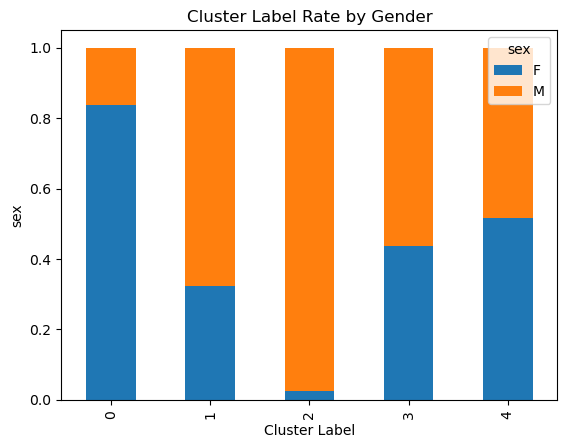

vocal_channel          song  speech
kmeans_features_label              
0                       134     283
1                         9     227
2                       192      16
3                         5     464
4                       408      90


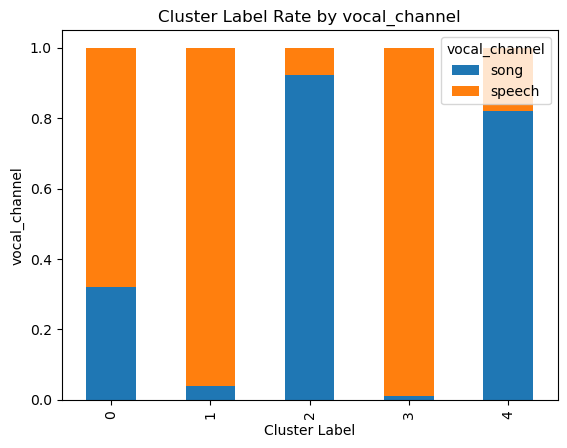

In [81]:
# sex:
kmeans_xt = pd.crosstab(df_labels['kmeans_features_label'], df_labels['sex'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Gender')
plt.ylabel('sex')
plt.xlabel('Cluster Label')
plt.show()

# vocal_channel:
kmeans_xt = pd.crosstab(df_labels['kmeans_features_label'], df_labels['vocal_channel'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by vocal_channel')
plt.ylabel('vocal_channel')
plt.xlabel('Cluster Label')
plt.show()

statement              Dogs are sitting by the door  \
kmeans_features_label                                 
0                                               223   
1                                               103   
2                                               101   
3                                               226   
4                                               261   

statement              Kids are talking by the door  
kmeans_features_label                                
0                                               194  
1                                               133  
2                                               107  
3                                               243  
4                                               237  


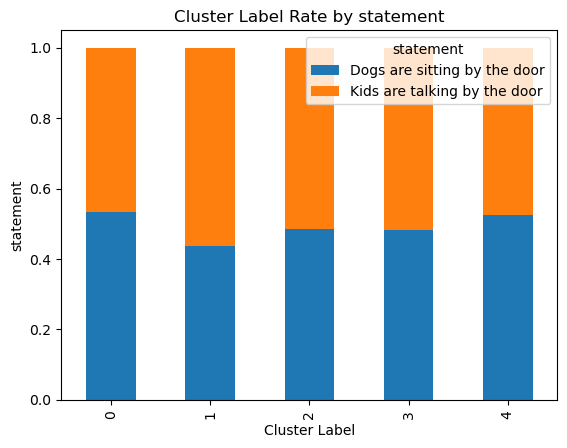

emotion                angry  calm  disgust  fearful  happy  neutral  sad  \
kmeans_features_label                                                       
0                        105     3       25       92     98        1   42   
1                          7    83       30       26     19       17   41   
2                         11    72        0       33     26       24   42   
3                         46    36       70       61     53       51   74   
4                        111    86       19       68     84       47   81   

emotion                surprised  
kmeans_features_label             
0                             51  
1                             13  
2                              0  
3                             78  
4                              2  


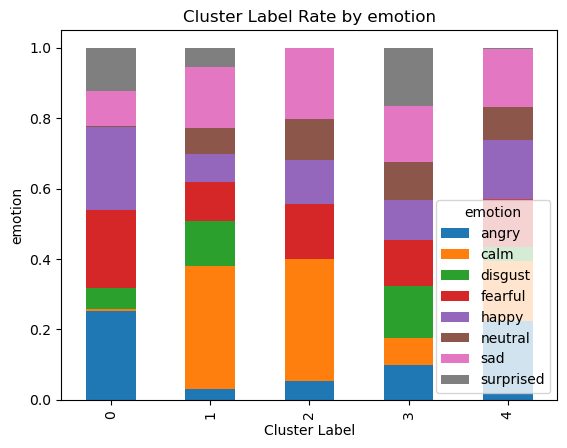

In [83]:
# statement:
kmeans_xt = pd.crosstab(df_labels['kmeans_features_label'], df_labels['statement'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by statement')
plt.ylabel('statement')
plt.xlabel('Cluster Label')
plt.show()

# emotion:
kmeans_xt = pd.crosstab(df_labels['kmeans_features_label'], df_labels['emotion'])
print(kmeans_xt)  

kmeans_xt_pct = kmeans_xt.div(kmeans_xt.sum(1).astype(float), axis=0)
kmeans_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by emotion')
plt.ylabel('emotion')
plt.xlabel('Cluster Label')
plt.show()